<ul>
    <li><strong>Code by:</strong> Tina Gholami</li>
    <li><strong>Student Number:</strong> 9531307</li>
    <li><strong>Final Project:</strong> hotel bookings (by <a href="https://www.kaggle.com/jessemostipak/hotel-booking-demand" target="_blank">Kaggle</a>)</li>
    <li><strong>Course:</strong> Data Mining / Amirkabir University of Technology (Tehran Polytechnic)</li>
    <li><strong>Supervisor:</strong> Dr. Ehsan Nazerfard</li>
</ul>

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## Import data

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Missing values

In [5]:
len(df)

119390

In [6]:
#All the missing values:

df.isnull().sum().sort_values(ascending = False) #So there are 4 features that have missing values.

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [7]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [8]:
df['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [9]:
#Now, I have to try to fill in (or drop) the missing values:
#agent: ID of the travel agency that made the booking.
#company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
#Therefore, since the "agent" and "company" are simply IDs, we can fill in the missing values with a digit, I chose "0".

df[['agent', 'company']] = df[['agent', 'company']].fillna(0.0)

In [10]:
df['agent']

0           0.0
1           0.0
2           0.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [11]:
df['company']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: company, Length: 119390, dtype: float64

In [12]:
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [13]:
#Now for the "country", I fill in the missing values by the mode metric. That way, I can find which countries are making the most reservations.

df['country'].fillna(df['country'].mode()[0], inplace = True)

In [14]:
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [15]:
df['children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [16]:
#Now for the "children", I fill in the missing values by the mean metric.

df['children'].fillna(round(df['children'].mean()), inplace = True)

In [17]:
df['children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [18]:
#Now I check the people (guests) who registered for the hotel bookings:

In [19]:
df[(df['adults'] == 0)].shape #!!

(403, 32)

In [20]:
df[(df['children'] == 0)].shape

(110800, 32)

In [21]:
df[(df['babies'] == 0)].shape 

(118473, 32)

In [22]:
#Now I check if all the 3 above, may have overlaps or not!

df[((df['adults'] + df['children'] + df['babies']) == 0)].shape #wow! So there are 180 rows with no guests. These rows will not give us any valuable information, so I delete them.

(180, 32)

In [23]:
# df[((df['adults'] + df['children'] + df['babies']) == 0)].index

In [24]:
df = df.drop(df[((df['adults'] + df['children'] + df['babies']) == 0)].index)

In [25]:
df.shape #119390 - 180 = 119210, so the rows were successfully dropped.

(119210, 32)

## Data types

In [26]:
#Checking the types of data:

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [27]:
#As we saw in the previous section, columns "children", "company", and "agent" all had a ".0", i.e. they were "float64" type. But it is not needed. So we simply convert them to "int64".

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [28]:
df[['children', 'company', 'agent']]

,children,company,agent
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,304
4,0,0,240
...,...,...,...
119385,0,0,394
119386,0,0,9
119387,0,0,9
119388,0,0,89


# ...............................................#
# Doing some Data Analytics:

## Cancelled bookings in %

In [99]:
percents = df['is_canceled'].value_counts() #is_canceled = 0 = 75011 => checked-in   #is_canceled = 1 = 44199 => cancelled
percents

0    75011
1    44199
Name: is_canceled, dtype: int64

In [100]:
checked = percents[0] #checked-in
checked

75011

In [101]:
cancelled = percents[1] #cancelled
cancelled

44199

In [103]:
total = checked + cancelled
total #which is logically also equal to len (df) = 119210

119210

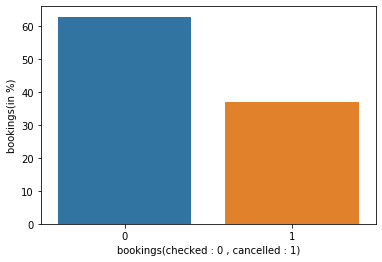

In [113]:
sns.barplot(x = [0, 1], y = [checked/total*100, cancelled/total*100])
plt.xlabel('bookings(checked : 0 , cancelled : 1)')
plt.ylabel('bookings(in %)')
plt.show() #so as we see bellow, (checked/total*100 = )63% got checked in. And also (cancelled/total*100 = )37% cancelled their reservations.

## Resort hotel & city hotel

In [117]:
df_arr = df.values

In [118]:
count = 0
flag = 0

for i in range(0, len(df)):
    if ((df_arr[:, 0][0 : i+1].all() == 'Resort Hotel') and (df_arr[:, 0][i+1 : -1].all() == 'City Hotel')):
        count = i
        flag += 1
        
print(count)
print(flag) 

40046
40047


In [120]:
print(df_arr[:, 0][40046])
print(df_arr[:, 0][40046 + 1]) #So, from "0-40046 = Resort Hotel" and also from "40047-end = City Hotel"

Resort Hotel
City Hotel


In [130]:
#or like before:

df_checked = df[(df['is_canceled'] == 0)]

hotels = df_checked['hotel'].value_counts()
hotels

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

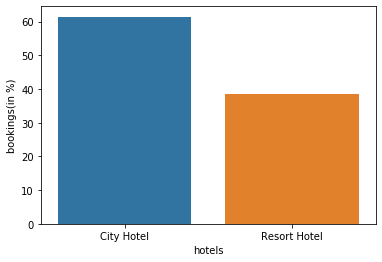

In [132]:
sns.barplot(x = ['City Hotel', 'Resort Hotel'], y = [hotels[0]/(hotels[0]+hotels[1])*100, hotels[1]/(hotels[0]+hotels[1])*100])
plt.xlabel('hotels')
plt.ylabel('bookings(in %)')
plt.show() #so about 61% booked a city hotel. And about 39% booked a resort hotel.So most people ❤️ a city hotel! :D

## Bookings for each year

In [136]:
years = df_checked['arrival_date_year'].value_counts()
years

2016    36299
2017    24886
2015    13826
Name: arrival_date_year, dtype: int64

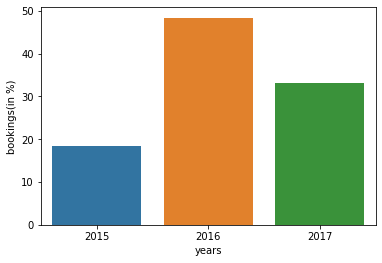

In [147]:
sns.barplot(x = ['2016', '2017', '2015'], y = [years[2016]/(years.sum())*100, years[2017]/(years.sum())*100, years[2015]/(years.sum())*100])
plt.xlabel('years')
plt.ylabel('bookings(in %)')
plt.show() #so about 50% of the bookings were for year 2016. But then it decreased by 15% for the next year, 2017.

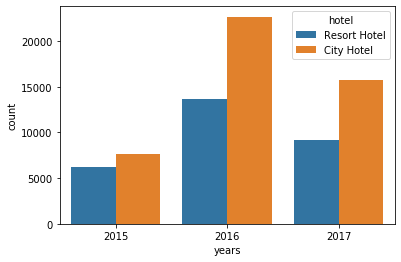

In [148]:
#also:
sns.countplot(x = 'arrival_date_year', hue = 'hotel', data = df_checked)
plt.xlabel('years')
plt.ylabel('count')
plt.show() #hotel types and years

## Busiest Month

In [153]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months = df_checked['arrival_date_month'].value_counts().reindex(month_list)
months

January      4115
February     5359
March        6620
April        6560
May          7103
June         6395
July         7907
August       8624
September    6385
October      6901
November     4651
December     4391
Name: arrival_date_month, dtype: int64

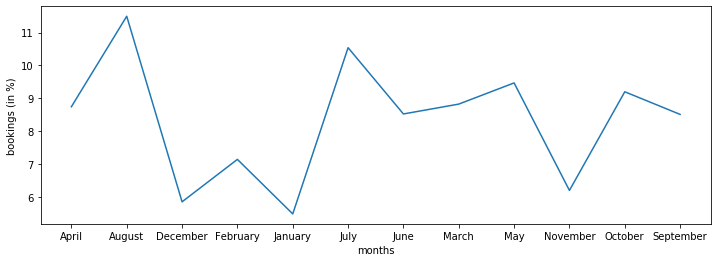

In [162]:
plt.figure(figsize=(12, 4))

sns.lineplot(x = months.index, y = months/months.sum()*100)
plt.xlabel('months')
plt.ylabel('bookings (in %)')
plt.show() #so most of the bookings are for Summer (July and August). Also the least of the bookings are for the start (January) and End (December) of the year.

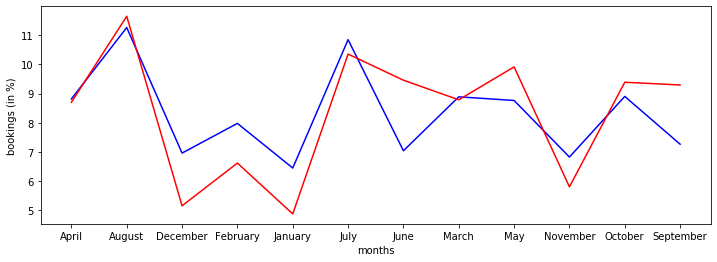

In [171]:
#also for different hotel types:

# month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months1 = df_checked[df_checked['hotel'] == 'Resort Hotel']['arrival_date_month'].value_counts().reindex(month_list)
months2 = df_checked[df_checked['hotel'] == 'City Hotel']['arrival_date_month'].value_counts().reindex(month_list)

plt.figure(figsize=(12, 4))

sns.lineplot(x = months1.index, y = months1/months1.sum()*100, color = 'blue') #blue: for the Resort Hotel
sns.lineplot(x = months2.index, y = months2/months2.sum()*100, color = 'red') #red: for the City Hotel
plt.xlabel('months')
plt.ylabel('bookings (in %)')
plt.show() #so the trend for both hotels is quite similar.

## Country of the people

In [183]:
c_names = df_checked['country'].value_counts()[0:10].index
c_names #we can aslo use the "pcountry" library for the names of the countries.

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD', 'USA'], dtype='object')

In [184]:
countries = df_checked['country'].value_counts()[0:10]
countries

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
Name: country, dtype: int64

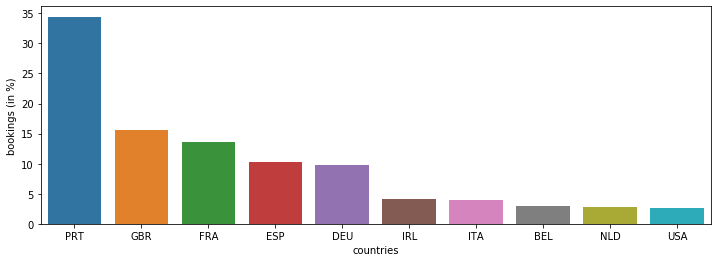

In [186]:
plt.figure(figsize=(12, 4))

sns.barplot(x = c_names, y = countries/countries.sum()*100)
plt.xlabel('countries')
plt.ylabel('bookings (in %)')
plt.show() #so the top four countries who did the reservations and didn't cancel are: Portugal(PRT), Britain(GBR), France(FRA), and Espain(ESP).

## Duration of the stay

In [227]:
total_days = df_checked['stays_in_weekend_nights'] + df['stays_in_week_nights']
indexes = total_days.value_counts().index[0:12]
days = total_days.value_counts().values[0:12]

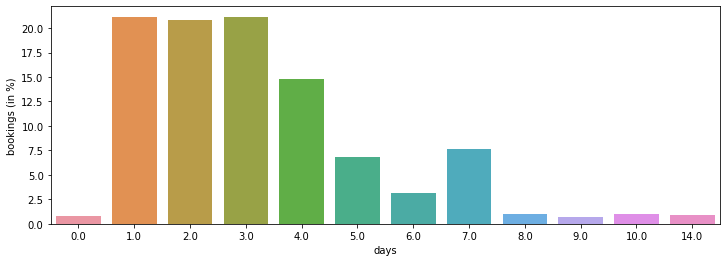

In [229]:
plt.figure(figsize=(12, 4))

sns.barplot(x = indexes, y = days/days.sum()*100)
plt.xlabel('days')
plt.ylabel('bookings (in %)')
plt.show() #so most of the people stay for 1, 2, and 3 nights. Which contains about 60% of the people.

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


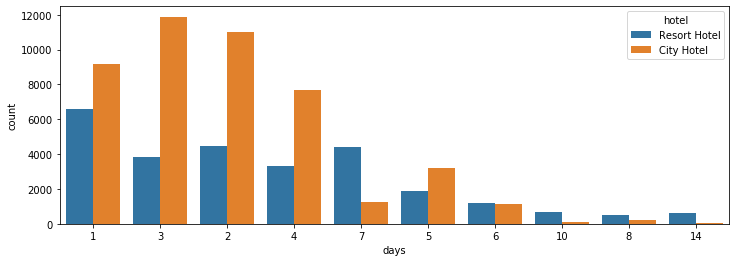

In [244]:
#so for each hotel:

plt.figure(figsize=(12, 4))
df_checked.loc[:, 'total_days'] = df_checked['stays_in_weekend_nights'] + df['stays_in_week_nights']
df_checked['total_days'] = df_checked['total_days'].astype('int64')

sns.countplot(x = total_days, hue = 'hotel', data = df_checked, order = df_checked['total_days'].value_counts().iloc[:10].index)
plt.xlabel('days')
plt.ylabel('count')
plt.show() #so the most popular duration of stay for the Resort hotel is "1, 7, 2" days. And for the City hotel it is "3, 2, 1" days.

## Accommodation type

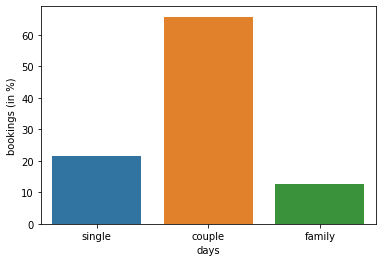

In [272]:
single = df_checked[(df_checked['adults'] == 1) & (df_checked['children'] == 0) & (df_checked['babies'] == 0)]
couple = df_checked[(df_checked['adults'] == 2) & (df_checked['children'] == 0) & (df_checked['babies'] == 0)]
family = df_checked[(df_checked['adults'] + df_checked['children'] + df_checked['babies']) > 2]

sns.barplot(x = ['single', 'couple', 'family'], y = [single.shape[0]/(single.shape[0]+couple.shape[0]+family.shape[0])*100 , couple.shape[0]/(single.shape[0]+couple.shape[0]+family.shape[0])*100 , family.shape[0]/(single.shape[0]+couple.shape[0]+family.shape[0])*100])
plt.xlabel('number of people')
plt.ylabel('bookings (in %)')
plt.show() #Nearly 67% of the reservations were done by couples.

# .....................................#

## Feature Engineeing

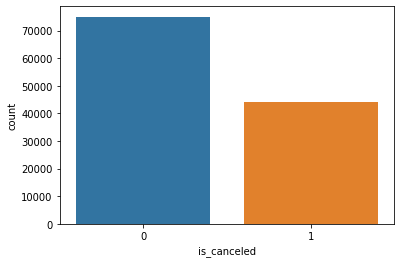

In [203]:
# balanced or imbalanced problem:

sns.countplot(x = 'is_canceled', data = df) #so this is an imbalanced problem. And most of the people have NOT canceled.

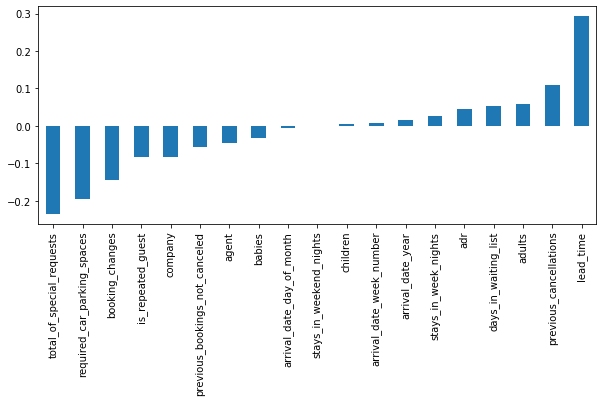

In [204]:
#One way to show the correlation, now usig matplotlib:

plt.figure(figsize = (10, 4))
df.corr()['is_canceled'].sort_values().drop('is_canceled').plot(kind = 'bar')

In [29]:
#In order not to lose my original dataframe "df" so that it is not effected by wrong feature engineering, I make a copy of my original dataframe "df" as "df_copy".

df_copy = df.copy()

In [30]:
df_copy['reserved_room_type']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119210, dtype: object

In [31]:
df_copy['assigned_room_type']

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 119210, dtype: object

In [32]:
#So since I am only interested to see if the "reserved_room_type" is different from "assigned_room_type", I make a new feature "room" to analyse it further.
#If the same room is assigned to the guest, then "room = 1 ". Otherwise "room = 0"

df_copy['room'] = 0
df_copy.loc[df_copy['reserved_room_type'] == df['assigned_room_type'], 'room'] = 1

In [33]:
df_copy['room']

0         1
1         1
2         0
3         1
4         1
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: room, Length: 119210, dtype: int64

In [34]:
#Another feature is "previous_cancellations" and "previous_bookings_not_canceled". These two features can simply be combined to make a new feature "total_canceled".
#So if canceled > not-canceled => "total_canceled = 1"
df_copy['total_canceled'] = 0
df_copy.loc[df_copy['previous_cancellations'] > df_copy['previous_bookings_not_canceled'], 'total_canceled'] = 1

In [35]:
df_copy['previous_cancellations']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: previous_cancellations, Length: 119210, dtype: int64

In [36]:
df_copy['previous_bookings_not_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: previous_bookings_not_canceled, Length: 119210, dtype: int64

In [37]:
df_copy['total_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: total_canceled, Length: 119210, dtype: int64

In [38]:
#So I drop those unwanted features explained above:

df_copy = df_copy.drop(['reserved_room_type', 'assigned_room_type', 'previous_cancellations', 'previous_bookings_not_canceled'], axis = 1)

In [39]:
#Now, Let's see features "reservation_status" and "reservation_status_date":

df_copy['reservation_status']

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119210, dtype: object

In [40]:
df_copy['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119210, dtype: object

In [41]:
#Since these two features give us only repeated and not valuable information, I drop them too:

df_copy = df_copy.drop(['reservation_status', 'reservation_status_date'], axis = 1)

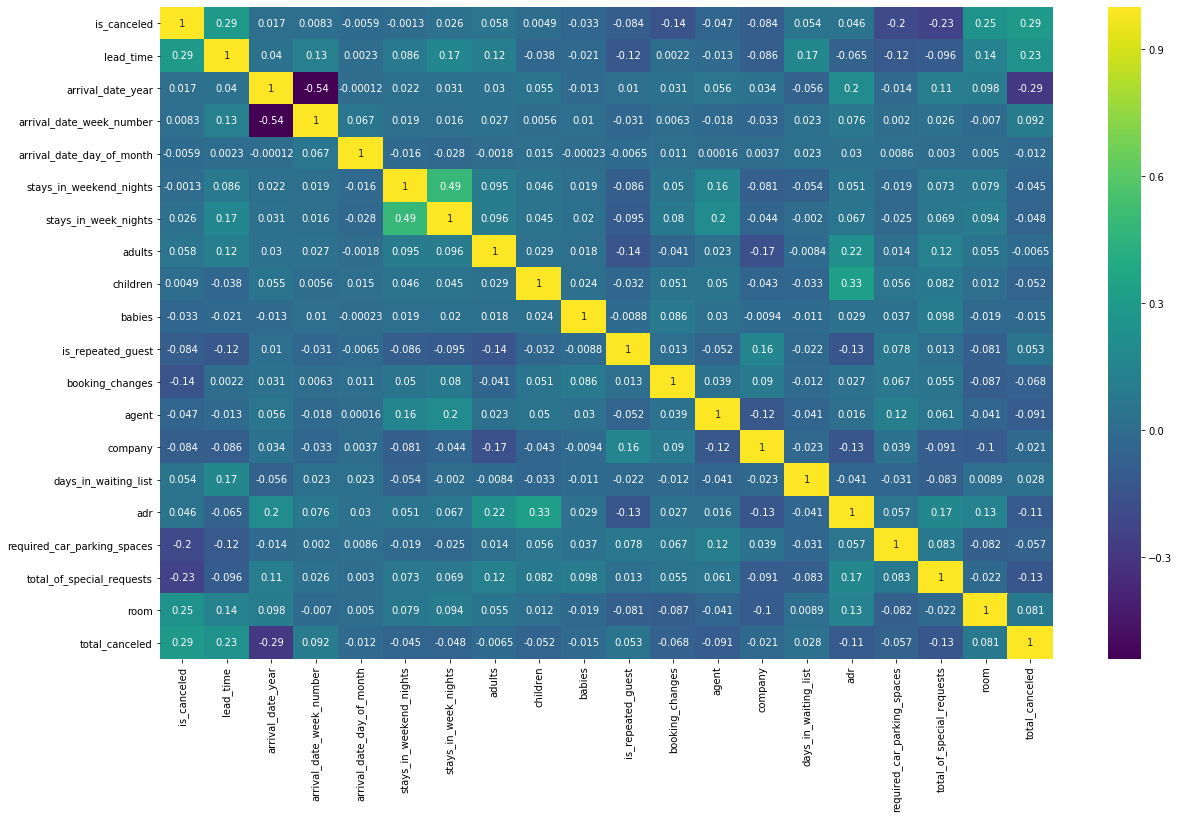

In [42]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0);

In [43]:
#So there are some features in the heat map that have really low correlations. I decide to drop the features with correlations of less than 0.01 (to be more precise,between -0.01 and 0.01).
#These features include: "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month".
#Also since ""

df_copy = df_copy.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis = 1)

In [44]:
df_copy['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119210, dtype: float64

In [45]:
#also "adr" is in float64. I convert it to int64 too.

df_copy['adr'] = df_copy['adr'].astype('int64')

In [46]:
df_copy['adr']

0           0
1           0
2          75
3          75
4          98
         ... 
119385     96
119386    225
119387    157
119388    104
119389    151
Name: adr, Length: 119210, dtype: int64

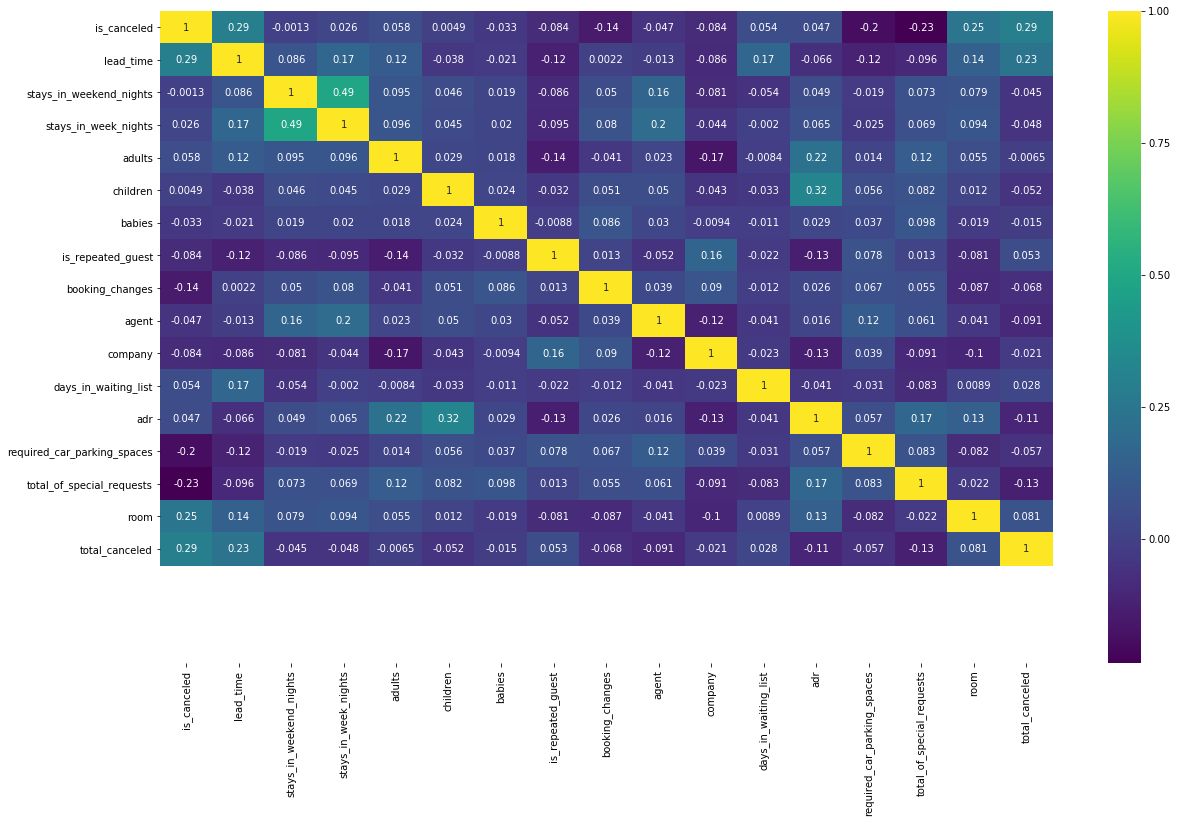

In [47]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #As we see bellow, there are still two features "stays_in_weekend_nights" and "children" that I didn't drop previously. That is because their relevant features "stays_in_week_nights" and "adult" have good enough correlations to prevent them from being dropped. So I keep these features.

## Encoding categorical features

In [48]:
df_copy

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,room,total_canceled
0,Resort Hotel,0,342,July,0,0,2,0,0,BB,...,No Deposit,0,0,0,Transient,0,0,0,1,0
1,Resort Hotel,0,737,July,0,0,2,0,0,BB,...,No Deposit,0,0,0,Transient,0,0,0,1,0
2,Resort Hotel,0,7,July,0,1,1,0,0,BB,...,No Deposit,0,0,0,Transient,75,0,0,0,0
3,Resort Hotel,0,13,July,0,1,1,0,0,BB,...,No Deposit,304,0,0,Transient,75,0,0,1,0
4,Resort Hotel,0,14,July,0,2,2,0,0,BB,...,No Deposit,240,0,0,Transient,98,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,5,2,0,0,BB,...,No Deposit,394,0,0,Transient,96,0,0,1,0
119386,City Hotel,0,102,August,2,5,3,0,0,BB,...,No Deposit,9,0,0,Transient,225,0,2,1,0
119387,City Hotel,0,34,August,2,5,2,0,0,BB,...,No Deposit,9,0,0,Transient,157,0,4,1,0
119388,City Hotel,0,109,August,2,5,2,0,0,BB,...,No Deposit,89,0,0,Transient,104,0,0,1,0


In [49]:
df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'room',
       'total_canceled'],
      dtype='object')

In [50]:
#categorical columns:
# 'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', distribution_channel, 'deposit_type', 'customer_type'

In [51]:
#because there is a Sequence quality between months of the year in column 'arrival_date_month', we can use a labelencode it:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['arrival_date_month'] = le.fit_transform(df_copy['arrival_date_month'])

In [52]:
df_copy['arrival_date_month']

0         5
1         5
2         5
3         5
4         5
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: arrival_date_month, Length: 119210, dtype: int32

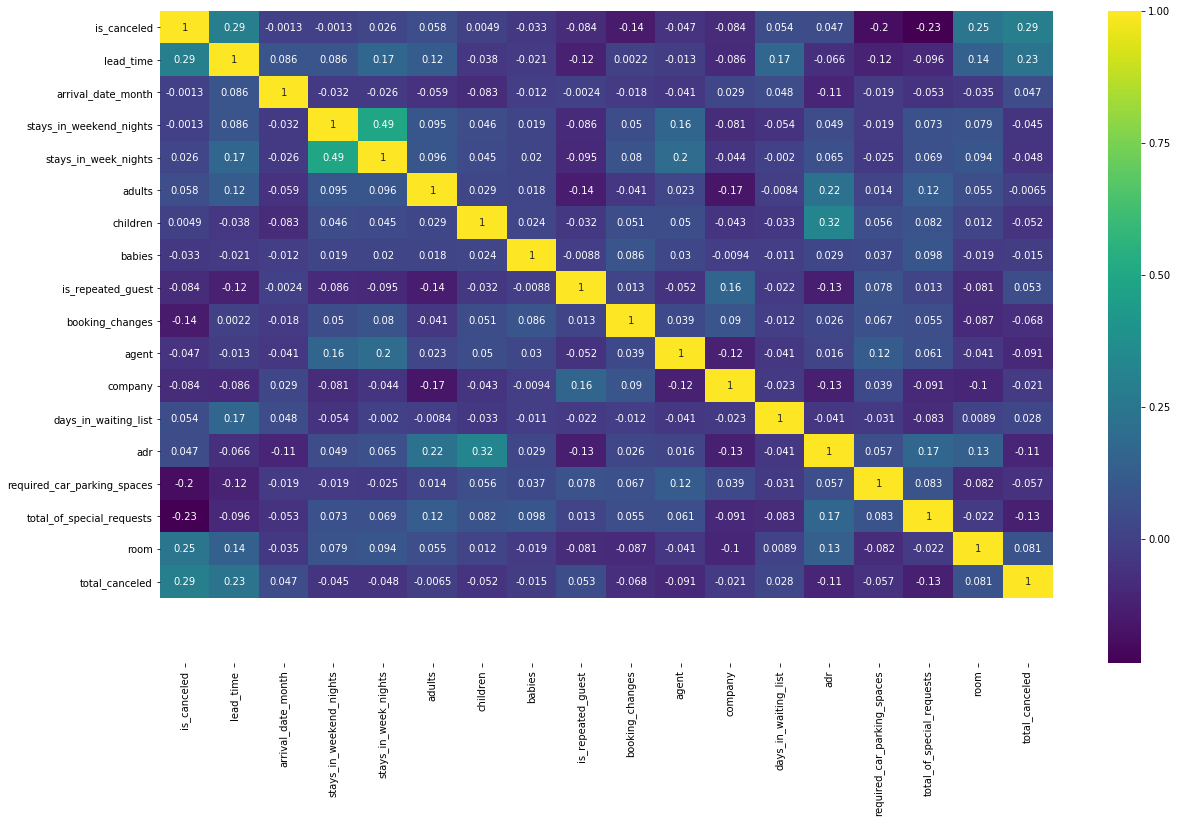

In [53]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So "arrival_date_month" has a low correlation with the label. I drop that too. 

In [54]:
df_copy = df_copy.drop(['arrival_date_month'], axis = 1)

In [55]:
# Now the "hotel" column:

le = LabelEncoder()
df_copy['hotel'] = le.fit_transform(df_copy['hotel'])

In [56]:
df_copy['hotel'] #Resort hotel = 1 , City hotel = 0

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119210, dtype: int32

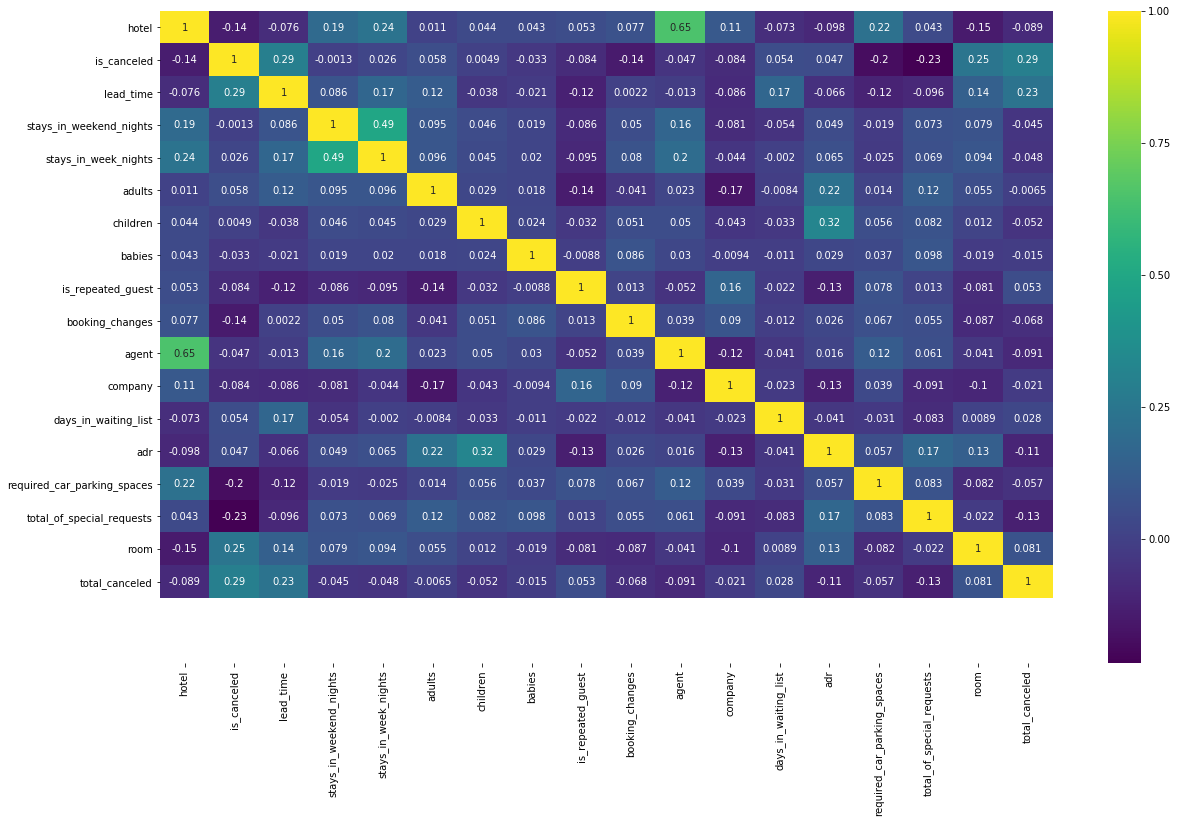

In [57]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "hotel" is high enough, I keep the "hotel" column.

In [58]:
# Now the "market_segment" column:

df_copy['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [59]:
le = LabelEncoder()
df_copy['market_segment'] = le.fit_transform(df_copy['market_segment'])

In [60]:
df_copy['market_segment']

0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119210, dtype: int32

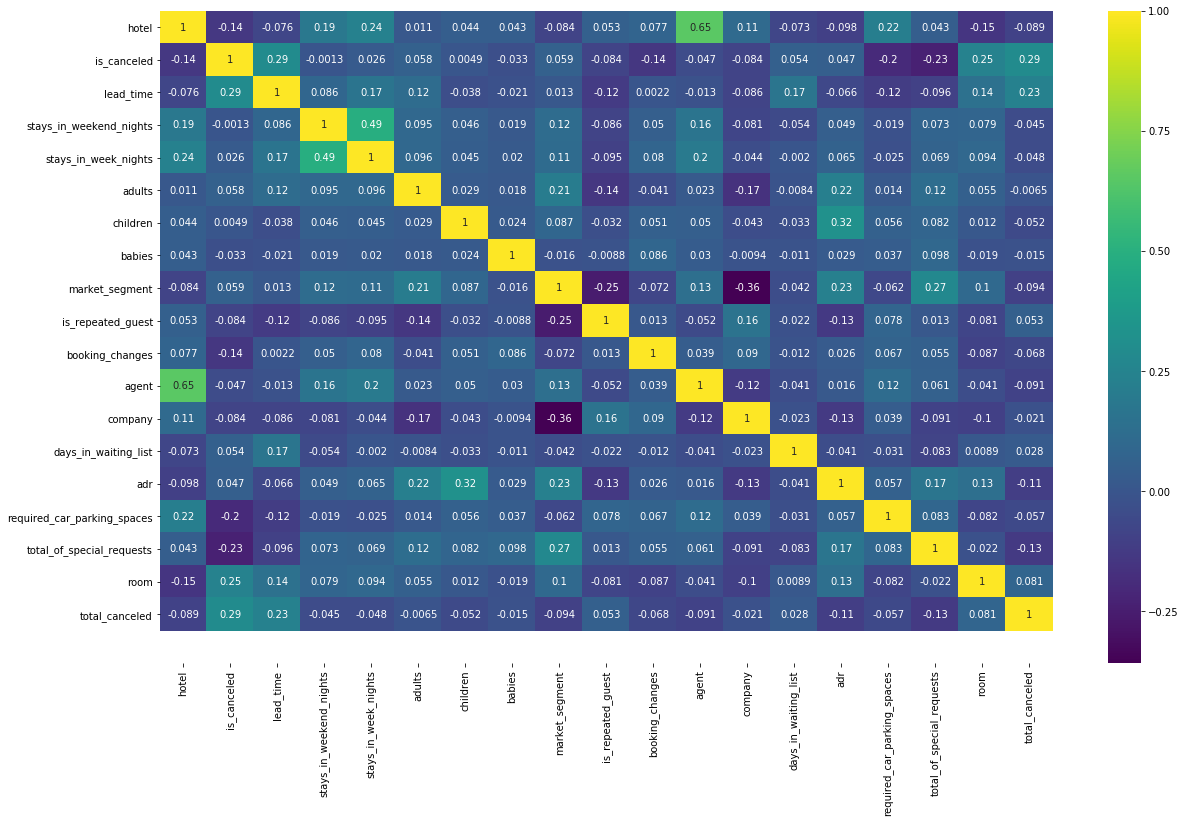

In [61]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "market_segment" is high enough, I keep the "market_segment" column.

In [62]:
# Now the "distribution_channel" column:

df_copy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [63]:
le = LabelEncoder()
df_copy['distribution_channel'] = le.fit_transform(df_copy['distribution_channel'])

In [64]:
df_copy['distribution_channel']

0         1
1         1
2         1
3         0
4         3
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: distribution_channel, Length: 119210, dtype: int32

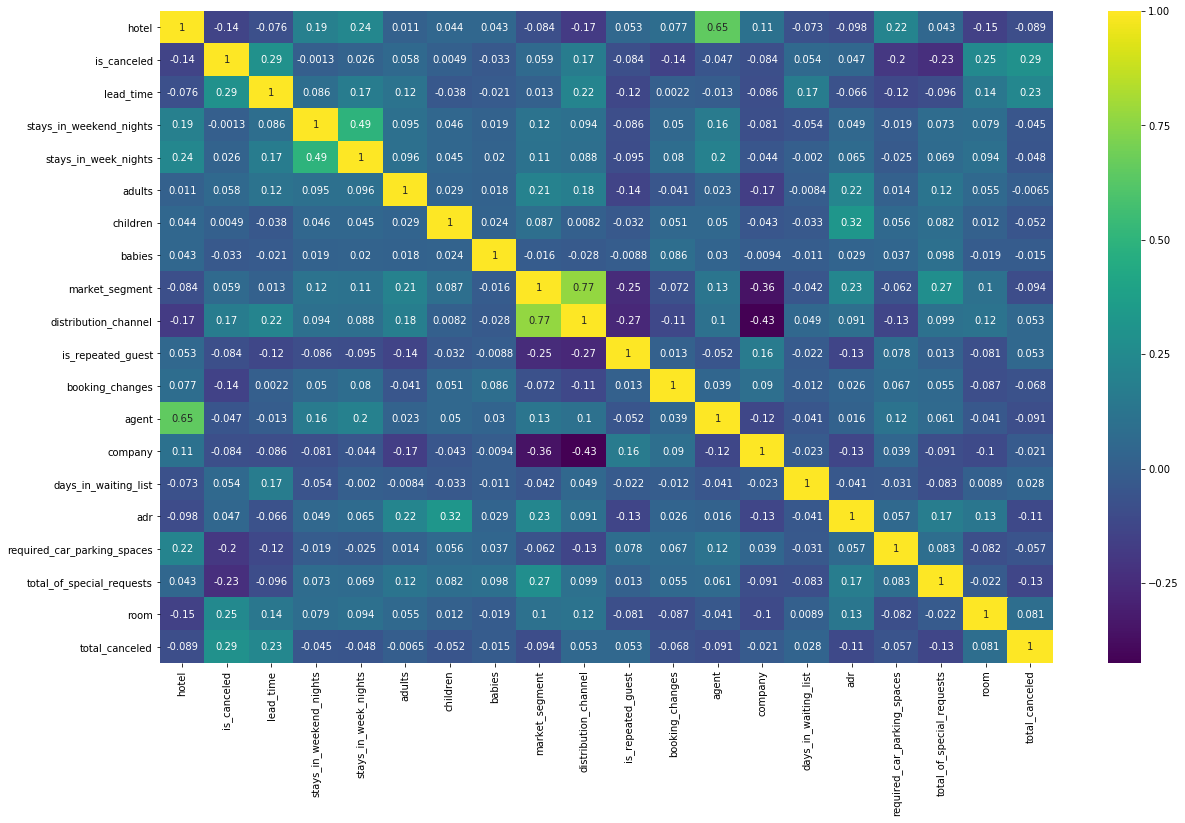

In [65]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "distribution_channel" is high enough, I keep the "distribution_channel" column.

In [66]:
# Now the "deposit_type" column:

df_copy['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [67]:
le = LabelEncoder()
df_copy['deposit_type'] = le.fit_transform(df_copy['deposit_type'])

In [68]:
df_copy['deposit_type']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 119210, dtype: int32

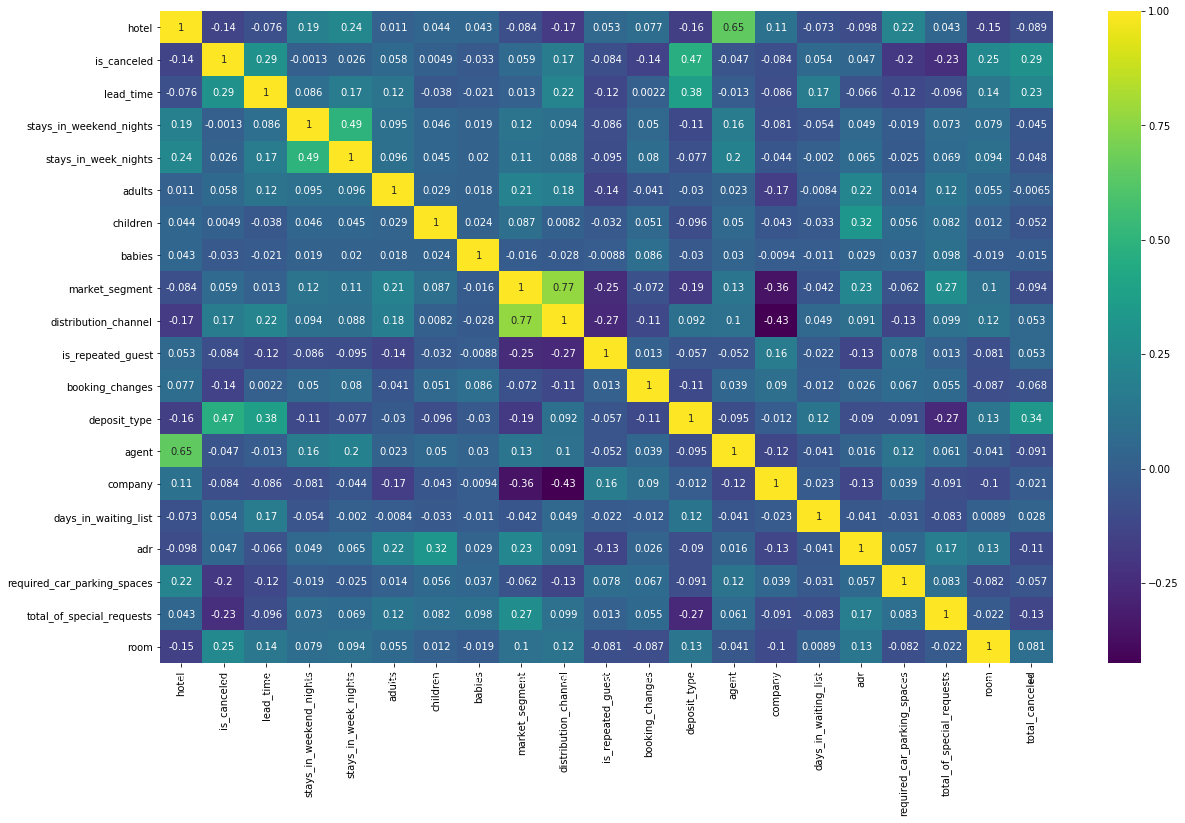

In [69]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "distribution_channel" is high enough, I keep the "distribution_channel" column.

In [70]:
# Now the "customer_type" column:

df_copy['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [71]:
le = LabelEncoder()
df_copy['customer_type'] = le.fit_transform(df_copy['customer_type'])

In [72]:
df_copy['customer_type']

0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: customer_type, Length: 119210, dtype: int32

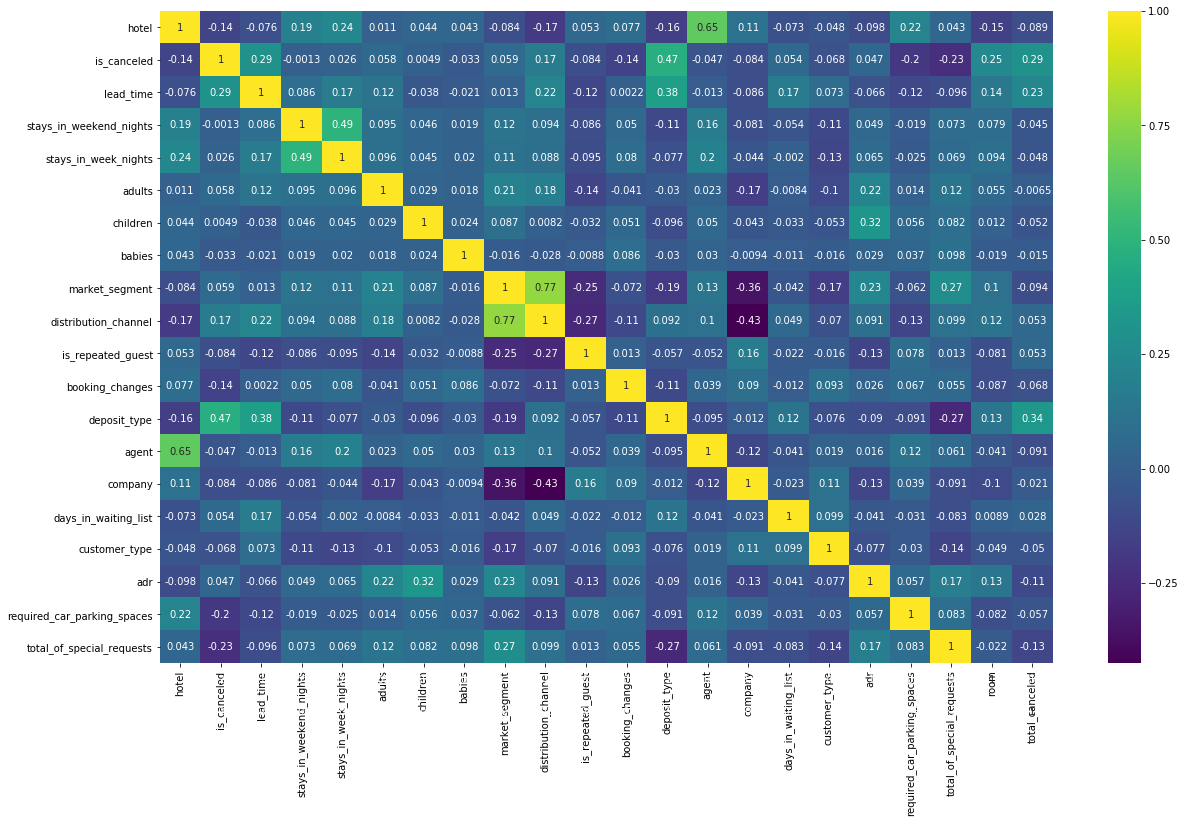

In [73]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "customer_type" is high enough, I keep the "customer_type" column.

In [74]:
# Now the "country" column:

df_copy['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [75]:
le = LabelEncoder()
df_copy['country'] = le.fit_transform(df_copy['country'])

In [76]:
df_copy['country']

0         135
1         135
2          59
3          59
4          59
         ... 
119385     15
119386     56
119387     43
119388     59
119389     43
Name: country, Length: 119210, dtype: int32

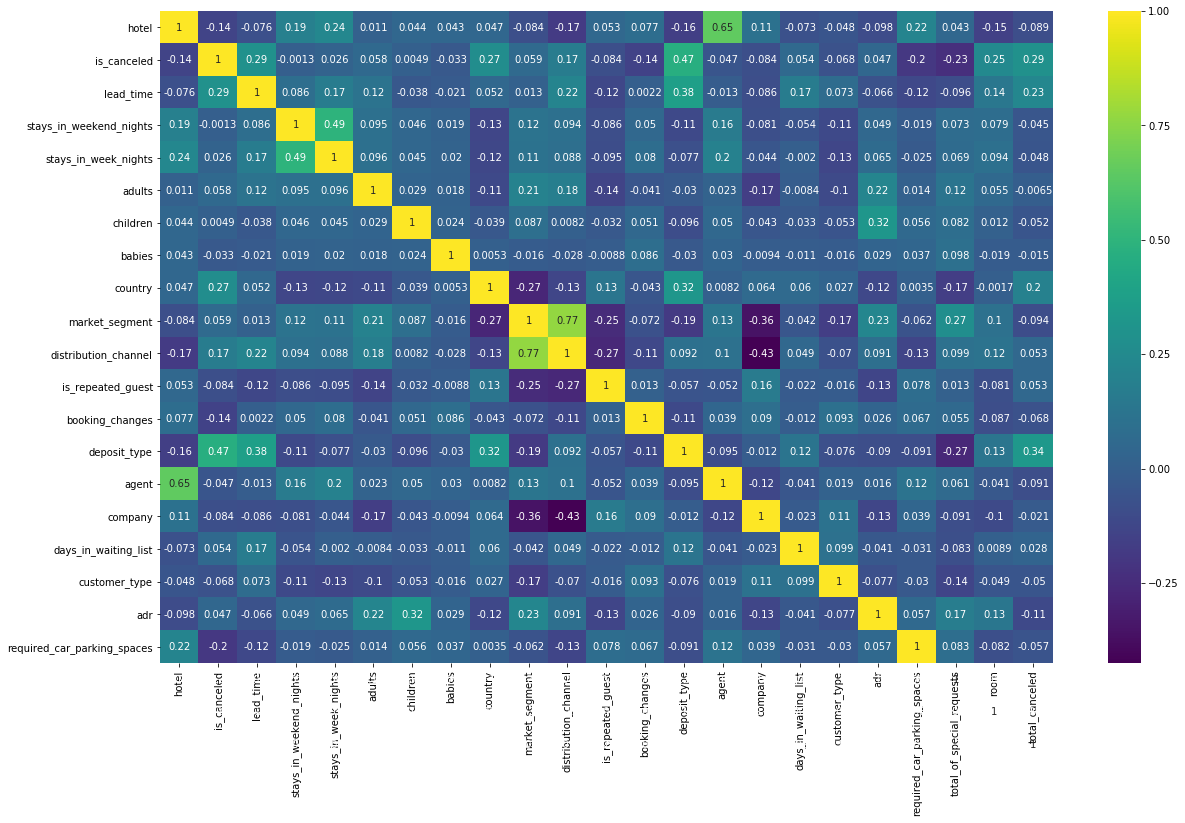

In [77]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "country" is high enough, I keep the "country" column.

In [78]:
# Now the "meal" column:

df_copy['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [79]:
le = LabelEncoder()
df_copy['meal'] = le.fit_transform(df_copy['meal'])

In [80]:
df_copy['meal']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119210, dtype: int32

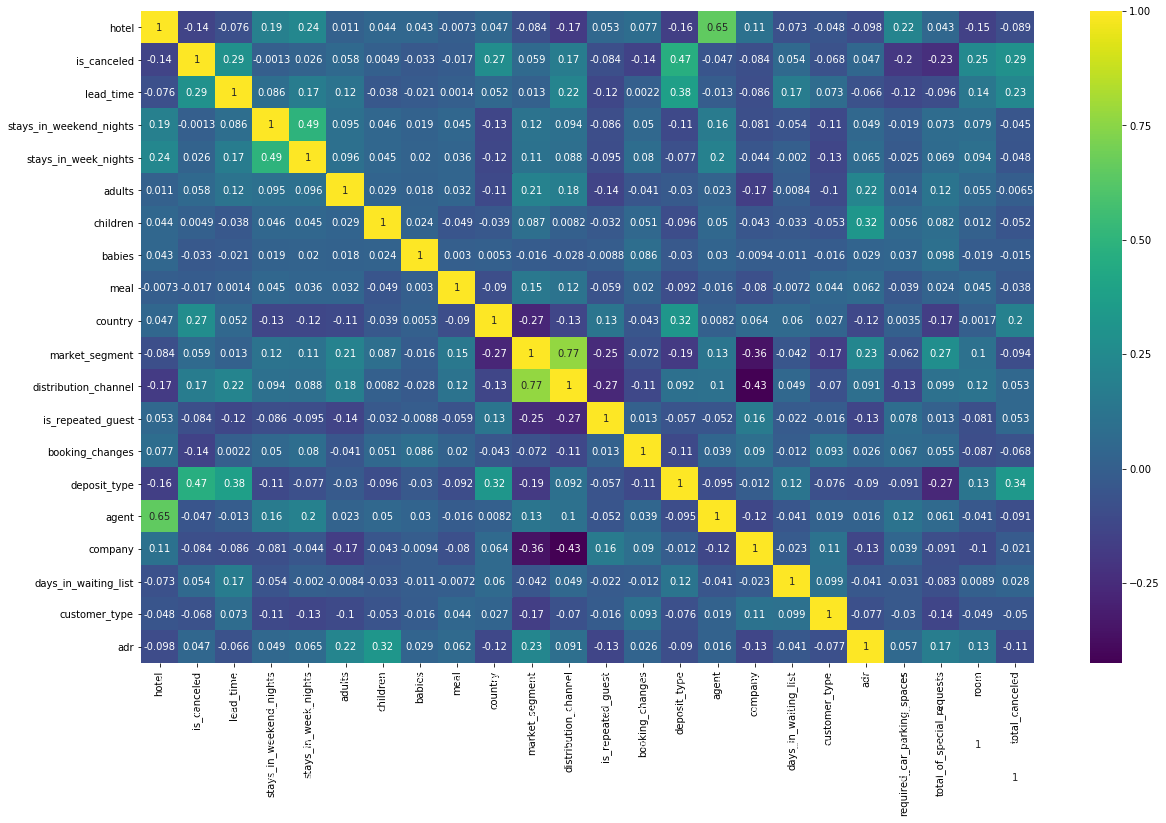

In [81]:
#The heatmap of the correlations:

plt.figure(figsize = (20, 12))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis') #the first column is for label "is_cancelled"
plt.ylim(20, 0); #So since the correlation for "meal" is high enough, I keep the "meal" column.

In [82]:
#I make another copy of "df_copy" so that if  I find the following methods not good, I still would have my main"df_copy" (which itself is a copy of the original "df").
df_copy2 = df_copy.copy()

In [83]:
one_hot1 = pd.get_dummies(df_copy2['market_segment'])
df_copy2 = df_copy2.drop('market_segment', axis = 1)
df_copy2 = df_copy2.join(one_hot1)

In [84]:
df_copy2.columns

Index([                      'hotel',                 'is_canceled',
                         'lead_time',     'stays_in_weekend_nights',
              'stays_in_week_nights',                      'adults',
                          'children',                      'babies',
                              'meal',                     'country',
              'distribution_channel',           'is_repeated_guest',
                   'booking_changes',                'deposit_type',
                             'agent',                     'company',
              'days_in_waiting_list',               'customer_type',
                               'adr', 'required_car_parking_spaces',
         'total_of_special_requests',                        'room',
                    'total_canceled',                             0,
                                   1,                             2,
                                   3,                             4,
                                  

In [85]:
one_hot2 = pd.get_dummies(df_copy2['distribution_channel'])
df_copy2 = df_copy2.drop('distribution_channel', axis = 1)
one_hot2 = one_hot2.rename(columns={0: 8, 1: 9, 2: 10, 3: 11, 4: 12})
df_copy2 = df_copy2.join(one_hot2)

In [86]:
df_copy2.columns

Index([                      'hotel',                 'is_canceled',
                         'lead_time',     'stays_in_weekend_nights',
              'stays_in_week_nights',                      'adults',
                          'children',                      'babies',
                              'meal',                     'country',
                 'is_repeated_guest',             'booking_changes',
                      'deposit_type',                       'agent',
                           'company',        'days_in_waiting_list',
                     'customer_type',                         'adr',
       'required_car_parking_spaces',   'total_of_special_requests',
                              'room',              'total_canceled',
                                   0,                             1,
                                   2,                             3,
                                   4,                             5,
                                  

In [87]:
one_hot3 = pd.get_dummies(df_copy2['deposit_type'])
df_copy2 = df_copy2.drop('deposit_type', axis = 1)
one_hot3 = one_hot3.rename(columns={0: 13, 1: 14, 2: 15})
df_copy2 = df_copy2.join(one_hot3)

In [88]:
df_copy2.columns

Index([                      'hotel',                 'is_canceled',
                         'lead_time',     'stays_in_weekend_nights',
              'stays_in_week_nights',                      'adults',
                          'children',                      'babies',
                              'meal',                     'country',
                 'is_repeated_guest',             'booking_changes',
                             'agent',                     'company',
              'days_in_waiting_list',               'customer_type',
                               'adr', 'required_car_parking_spaces',
         'total_of_special_requests',                        'room',
                    'total_canceled',                             0,
                                   1,                             2,
                                   3,                             4,
                                   5,                             6,
                                  

In [89]:
one_hot4 = pd.get_dummies(df_copy2['customer_type'])
df_copy2 = df_copy2.drop('customer_type', axis = 1)
one_hot4 = one_hot4.rename(columns={0: 16, 1: 17, 2: 18, 3: 19})
df_copy2 = df_copy2.join(one_hot4)

In [90]:
df_copy2.columns

Index([                      'hotel',                 'is_canceled',
                         'lead_time',     'stays_in_weekend_nights',
              'stays_in_week_nights',                      'adults',
                          'children',                      'babies',
                              'meal',                     'country',
                 'is_repeated_guest',             'booking_changes',
                             'agent',                     'company',
              'days_in_waiting_list',                         'adr',
       'required_car_parking_spaces',   'total_of_special_requests',
                              'room',              'total_canceled',
                                   0,                             1,
                                   2,                             3,
                                   4,                             5,
                                   6,                             7,
                                  

In [91]:
one_hot5 = pd.get_dummies(df_copy2['country'])
df_copy2 = df_copy2.drop('country', axis = 1)

for i in range(0, one_hot5.columns.shape[0]):
    one_hot5 = one_hot5.rename(columns = {i:i+200}) #I used 200 so that it wouldn't overlap with other columns.

df_copy2 = df_copy2.join(one_hot5)

In [92]:
one_hot5.columns

Int64Index([200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
            ...
            367, 368, 369, 370, 371, 372, 373, 374, 375, 376],
           dtype='int64', length=177)

In [93]:
df_copy2.columns #so one_hot5 was correctly joined to the dataframe.

Index([                  'hotel',             'is_canceled',
                     'lead_time', 'stays_in_weekend_nights',
          'stays_in_week_nights',                  'adults',
                      'children',                  'babies',
                          'meal',       'is_repeated_guest',
       ...
                             367,                       368,
                             369,                       370,
                             371,                       372,
                             373,                       374,
                             375,                       376],
      dtype='object', length=216)

In [94]:
one_hot6 = pd.get_dummies(df_copy2['meal'])
df_copy2 = df_copy2.drop('meal', axis = 1)
one_hot6 = one_hot6.rename(columns={0: 20, 1: 21, 2:22, 3: 23, 4: 24})
df_copy2 = df_copy2.join(one_hot6)

In [95]:
df_copy2.columns

Index([                  'hotel',             'is_canceled',
                     'lead_time', 'stays_in_weekend_nights',
          'stays_in_week_nights',                  'adults',
                      'children',                  'babies',
             'is_repeated_guest',         'booking_changes',
       ...
                             372,                       373,
                             374,                       375,
                             376,                        20,
                              21,                        22,
                              23,                        24],
      dtype='object', length=220)

In [96]:
one_hot7 = pd.get_dummies(df_copy2['hotel'])
df_copy2 = df_copy2.drop('hotel', axis = 1)
one_hot7 = one_hot7.rename(columns={0: 25, 1: 26})
df_copy2 = df_copy2.join(one_hot7)

In [97]:
df_copy2.columns

Index([            'is_canceled',               'lead_time',
       'stays_in_weekend_nights',    'stays_in_week_nights',
                        'adults',                'children',
                        'babies',       'is_repeated_guest',
               'booking_changes',                   'agent',
       ...
                             374,                       375,
                             376,                        20,
                              21,                        22,
                              23,                        24,
                              25,                        26],
      dtype='object', length=221)

In [98]:
#so by now, the dataframe we are going to work with is "df_copy2". And we have 221 columns.

In [99]:
#seeing the correlations again:

correlations = df_copy2.corr()
correlations
# df.corr().sort_values(by = ['is_canceled'], ascending = False).iloc[:, 0]

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,...,374,375,376,20,21,22,23,24,25,26
is_canceled,1.000000,0.292876,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,-0.144832,-0.046770,...,0.000898,0.001096,0.001550,0.012786,0.038790,-0.020085,0.002127,-0.025983,0.137082,-0.137082
lead_time,0.292876,1.000000,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.002230,-0.013114,...,-0.008234,-0.001365,-0.001144,-0.039154,0.009646,0.136377,-0.096428,-0.015613,0.075970,-0.075970
stays_in_weekend_nights,-0.001323,0.085985,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,0.050191,0.162411,...,-0.000704,0.002358,-0.003941,-0.065954,0.017596,0.105888,-0.037354,0.022351,-0.187816,0.187816
stays_in_week_nights,0.025542,0.166892,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,0.080018,0.196777,...,-0.006307,0.000002,-0.000761,-0.061608,0.015435,0.122563,-0.065796,0.032418,-0.235955,0.235955
adults,0.058182,0.117575,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.041472,0.023370,...,-0.003231,0.001003,0.001418,-0.042028,0.014193,0.048051,0.004736,-0.006129,-0.010571,0.010571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,-0.020085,0.136377,0.105888,0.122563,0.048051,0.015639,0.017631,-0.039930,0.058539,0.146591,...,-0.008635,-0.001522,0.002284,-0.686990,-0.030498,1.000000,-0.115756,-0.036971,-0.173496,0.173496
23,0.002127,-0.096428,-0.037354,-0.065796,0.004736,-0.067433,-0.014230,-0.041479,-0.031554,-0.170151,...,0.022721,0.005935,-0.001805,-0.576164,-0.025578,-0.115756,1.000000,-0.031007,0.216922,-0.216922
24,-0.025983,-0.015613,0.022351,0.032418,-0.006129,-0.013794,0.005844,-0.002350,0.023362,0.079074,...,-0.002579,-0.000408,-0.000576,-0.184021,-0.008169,-0.036971,-0.031007,1.000000,-0.139916,0.139916
25,0.137082,0.075970,-0.187816,-0.235955,-0.010571,-0.044013,-0.043386,-0.052526,-0.076598,-0.651293,...,0.006087,-0.001423,-0.002012,0.041702,-0.105836,-0.173496,0.216922,-0.139916,1.000000,-1.000000


In [100]:
correlations['is_canceled']

is_canceled                1.000000
lead_time                  0.292876
stays_in_weekend_nights   -0.001323
stays_in_week_nights       0.025542
adults                     0.058182
                             ...   
22                        -0.020085
23                         0.002127
24                        -0.025983
25                         0.137082
26                        -0.137082
Name: is_canceled, Length: 221, dtype: float64

In [101]:
df_copy3 = df_copy2.copy() #Again here, we HAVE TO make a copy of "df_copy2" and name it "df_copy3". The reason is that when we want to drop the collumns with low correlation in below, the index of the chosen column MUST NOT change. And for that, we have to make a copy of the current data frame.

In [102]:
df_copy3.shape

(119210, 221)

In [103]:
for i in range(1, 220): #since we have 221 columns in general.
    if ((correlations['is_canceled'].iloc[i] < 0.01) and (correlations['is_canceled'].iloc[i] > -0.01)):
        df_copy3 = df_copy3.drop(df_copy2.columns[i], axis = 1)

# #or similarly:
# flag = 0
# while(flag != 220): #since we have 221 columns in general.
#     flag += 1
#     if ((correlations['is_canceled'].iloc[flag] < 0.01) and (correlations['is_canceled'].iloc[flag] > -0.01)):
#         df_copy3 = df_copy3.drop(df_copy2.columns[flag], axis = 1)

In [104]:
df_copy3.shape

(119210, 77)

In [109]:
df_copy3

,is_canceled,lead_time,stays_in_week_nights,adults,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,...,342,349,354,369,20,21,22,24,25,26
0,0,342,0,2,0,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,737,0,2,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,7,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,13,1,1,0,0,0,304,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,14,2,2,0,0,0,240,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,5,2,0,0,0,394,0,0,...,0,0,0,0,1,0,0,0,1,0
119386,0,102,5,3,0,0,0,9,0,0,...,0,0,0,0,1,0,0,0,1,0
119387,0,34,5,2,0,0,0,9,0,0,...,0,0,0,0,1,0,0,0,1,0
119388,0,109,5,2,0,0,0,89,0,0,...,0,0,0,0,1,0,0,0,1,0


## Train test split

In [239]:
# #The heatmap of the correlations:

# plt.figure(figsize = (20, 12))
# sns.heatmap(df_copy2.corr(), annot = True, cmap = 'viridis') 
# plt.ylim(20, 0);

In [106]:
from sklearn.model_selection import train_test_split

x = df_copy3.drop('is_canceled', axis = 1).values
y = df_copy3['is_canceled'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [107]:
x_train

array([[  4,   2,   2, ...,   0,   1,   0],
       [ 48,   2,   3, ...,   0,   1,   0],
       [ 75,   1,   3, ...,   0,   1,   0],
       ...,
       [206,   3,   2, ...,   0,   0,   1],
       [ 17,   0,   1, ...,   0,   1,   0],
       [256,   3,   2, ...,   0,   1,   0]], dtype=int64)

In [108]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Model 1: Random Forest (Ensemble Method)

In [111]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) #n_estimators: the number of trees (the more complex the dataset, the more trees we need!)    #Tunning: increasing the "n_estimators" to increase the accuracy
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Evaluating Model 1

In [112]:
y_pred_1 = forest.predict(x_test)

In [113]:
y_pred_1

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_1 = confusion_matrix(y_test, y_pred_1)
ac_1 = accuracy_score(y_test, y_pred_1)

print(cm_1)
print(ac_1)

[[13882  1081]
 [ 1849  7030]]
0.8771076251992282


In [ ]:
#So the accuracy for the ensemble method "Random Forest" is about 88%.


## Model 2: ANN (Nueral Netwok Method)

In [147]:
#we should do feature scaling before deep learning problems:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [167]:
#Initializing the ANN:
import tensorflow
from tensorflow.keras.models import Sequential

ann = Sequential()

In [168]:
#Adding the input layer and the first hidden layer:

from tensorflow.keras.layers import Dense

ann.add(Dense(units = 100, activation = 'relu')) 

In [169]:
#Adding the second hidden layer:

ann.add(Dense(units = 100, activation = 'relu'))

In [170]:
#Adding the output layer:

ann.add(Dense(units = 1, activation = 'sigmoid'))

In [171]:
#Compiling the ANN:

ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [200]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  7700      
_________________________________________________________________
dense_16 (Dense)             multiple                  10100     
_________________________________________________________________
dense_17 (Dense)             multiple                  101       
Total params: 17,901
Trainable params: 17,901
Non-trainable params: 0
_________________________________________________________________


In [172]:
#Training the ANN on the Training set:

ann.fit(x_train, y_train, epochs = 100)

Train on 95368 samples
Epoch 1/100
95368/95368 [==============================] - 7s 76us/sample - loss: 0.3505 - acc: 0.8325
Epoch 2/100
95368/95368 [==============================] - 8s 87us/sample - loss: 0.3242 - acc: 0.8455
Epoch 3/100
95368/95368 [==============================] - 8s 80us/sample - loss: 0.3159 - acc: 0.8510
Epoch 4/100
95368/95368 [==============================] - 8s 80us/sample - loss: 0.3093 - acc: 0.8542
Epoch 5/100
95368/95368 [==============================] - 8s 83us/sample - loss: 0.3043 - acc: 0.8569
Epoch 6/100
95368/95368 [==============================] - 8s 86us/sample - loss: 0.2997 - acc: 0.8600
Epoch 7/100
95368/95368 [==============================] - 8s 88us/sample - loss: 0.2963 - acc: 0.8611
Epoch 8/100
95368/95368 [==============================] - 10s 100us/sample - loss: 0.2936 - acc: 0.8631
Epoch 9/100
95368/95368 [==============================] - 13s 138us/sample - loss: 0.2900 - acc: 0.8652
Epoch 10/100
95368/95368 [====================

95368/95368 [==============================] - 10s 105us/sample - loss: 0.2111 - acc: 0.9037
Epoch 80/100
95368/95368 [==============================] - 9s 95us/sample - loss: 0.2121 - acc: 0.9015
Epoch 81/100
95368/95368 [==============================] - 9s 97us/sample - loss: 0.2107 - acc: 0.9033
Epoch 82/100
95368/95368 [==============================] - 9s 95us/sample - loss: 0.2105 - acc: 0.9040
Epoch 83/100
95368/95368 [==============================] - 9s 94us/sample - loss: 0.2097 - acc: 0.9031
Epoch 84/100
95368/95368 [==============================] - 9s 90us/sample - loss: 0.2092 - acc: 0.9037
Epoch 85/100
95368/95368 [==============================] - 8s 81us/sample - loss: 0.2093 - acc: 0.9041
Epoch 86/100
95368/95368 [==============================] - 8s 80us/sample - loss: 0.2086 - acc: 0.9046
Epoch 87/100
95368/95368 [==============================] - 7s 77us/sample - loss: 0.2082 - acc: 0.9043
Epoch 88/100
95368/95368 [==============================] - 8s 79us/sample 

## Evaluating Model 2

In [174]:
#The model's accuracy above, is about 90%. But I check that thriugh the following code lines as well:

In [175]:
y_pred_2 = ann.predict(x_test)
y_pred_2 = (y_pred_2 > 0.5)

In [176]:
y_pred_2

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_2 = confusion_matrix(y_test, y_pred_2)
ac_2 = accuracy_score(y_test, y_pred_2)

print(cm_2)
print(ac_2) 

[[13400  1563]
 [ 1875  7004]]
0.8558006878617566


In [201]:
#So the accuracy in the ANN model is 85%.

## Check overfitting for model 2:

In [187]:
#Initializing the ANN:
import tensorflow
from tensorflow.keras.models import Sequential

ann_early = Sequential()

In [188]:
#Adding the input layer and the first hidden layer:

from tensorflow.keras.layers import Dense

ann_early.add(Dense(units = 100, activation = 'relu')) 

In [189]:
#Adding the second hidden layer:

ann_early.add(Dense(units = 100, activation = 'relu'))

In [190]:
#Adding the output layer:

ann_early.add(Dense(units = 1, activation = 'sigmoid'))

In [191]:
#Compiling the ANN:

ann_early.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [192]:
#With early stopping:

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

ann_early.fit(x = x_train, y = y_train, epochs = 100, validation_data = [x_test, y_test], callbacks = [early_stop])

Train on 95368 samples, validate on 23842 samples
Epoch 1/100
95368/95368 [==============================] - 7s 71us/sample - loss: 0.3499 - acc: 0.8333 - val_loss: 0.3319 - val_acc: 0.8452
Epoch 2/100
95368/95368 [==============================] - 6s 61us/sample - loss: 0.3238 - acc: 0.8450 - val_loss: 0.3266 - val_acc: 0.8439
Epoch 3/100
95368/95368 [==============================] - 5s 54us/sample - loss: 0.3164 - acc: 0.8500 - val_loss: 0.3153 - val_acc: 0.8516
Epoch 4/100
95368/95368 [==============================] - 5s 52us/sample - loss: 0.3100 - acc: 0.8540 - val_loss: 0.3128 - val_acc: 0.8534
Epoch 5/100
95368/95368 [==============================] - 5s 52us/sample - loss: 0.3047 - acc: 0.8567 - val_loss: 0.3124 - val_acc: 0.8561
Epoch 6/100
95368/95368 [==============================] - 5s 55us/sample - loss: 0.3011 - acc: 0.8591 - val_loss: 0.3091 - val_acc: 0.8559
Epoch 7/100
95368/95368 [==============================] - 6s 61us/sample - loss: 0.2968 - acc: 0.8613 - val_l

In [ ]:
#So the accuracy is 80% by early  stopping.

In [194]:
metrics = pd.DataFrame(ann_early.history.history)
metrics

,loss,acc,val_loss,val_acc
0,0.349857,0.833330,0.331926,0.845231
1,0.323802,0.845000,0.326605,0.843931
2,0.316429,0.850023,0.315296,0.851648
3,0.309989,0.853955,0.312816,0.853368
4,0.304729,0.856681,0.312371,0.856052
5,0.301135,0.859146,0.309091,0.855885
6,0.296848,0.861337,0.307296,0.857940
7,0.293779,0.863308,0.309472,0.857940


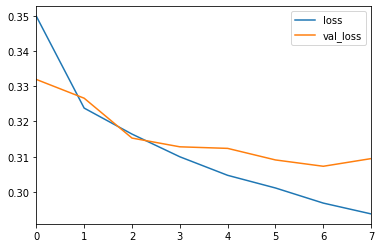

In [195]:
metrics[['loss', 'val_loss']].plot() 

In [202]:
#No overfitting then!